In [1]:
import torch
import torch.functional as F
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

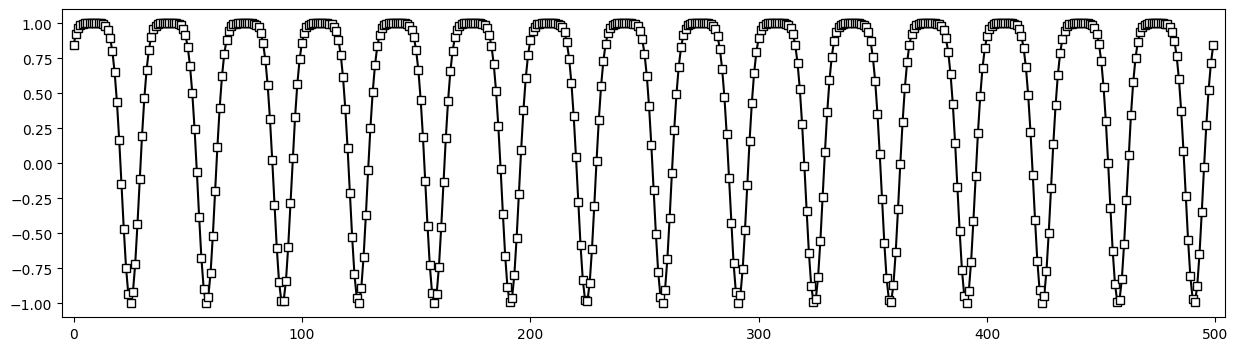

In [2]:
# Create the data
N = 500

time = torch.linspace(0, 30*torch.pi, N)
data = torch.sin(time + torch.cos(time))

plt.figure(figsize=(15,4))
plt.plot(data, 'ks-', markerfacecolor='w')
plt.xlim([-5, N+4])
plt.show()

In [1]:
# Create the Deep Learning Model
def createTheNet(printtoggle, input_size, num_hidden, num_layers, bias, batchsize):
    class lstmClassNet(nn.Module):
        def __init__(self, input_size, num_hidden, num_layers, bias, batchsize):
            
            super().__init__()
            self.printT = printtoggle
            
            # Store Parameters
            self.input_size = input_size
            self.num_hidden = num_hidden
            self.num_layers = num_layers
            self.bias = bias
            self.batchsize = batchsize
            
            # # # ----- RNN layers ------ # # #
            # nn.RNN(input_size, num_hidden)
            self.lstm = nn.LSTM(input_size, num_hidden,  num_layers,
                              bias=self.bias)
            
            # # # ----- linear layer ------ # # #
            self.out = nn.Linear(num_hidden, 1)
            
        def forward(self,x):
            
            # removed init of hidden for rnn
            # hidden = torch.zeros(self.num_layers, self.batchsize, self.num_hidden)
            if self.printT: print(f'Input: {list(x.shape)}')
            
            # run through the RNN layer
            # y,hidden = self.rnn(x, hidden)
            y,hidden = self.lstm(x)
            if self.printT: print(f'RNN-out: {list(y.shape)}')
            if self.printT: print(f'RNN-Hidden: {list(hidden[0].shape)}')
            if self.printT: print(f'RNN-Cell: {list(hidden[1].shape)}')
            
            # pass the rnn output through linear layer
            o = self.out(y)
            if self.printT: print(f'Output: {list(o.shape)}')
            
            return o, hidden
    
    modelInstance = lstmClassNet(input_size, num_hidden, num_layers, bias, batchsize)

    lossfun = nn.BCEWithLogitsLoss()
    
    optimizer = torch.optim.Adam(modelInstance.parameters(), lr=0.001)
    
    return modelInstance, lossfun, optimizer

In [2]:
# network parameters
input_size = 1  # channels/features of data
num_hidden = 16 # breadth of model (number of hidden layers)
num_layers = 2  # depth of model   (number of stacks of hidden layers)
seqlength  = 5  # num of data points used for learning in each segment 
batchsize  = 1  # number of batches of seqlength
bias = True
#N = 50          # number of data units